In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import matplotlib.patheffects as path_effects
from highlight_text import fig_text

In [5]:
df = pd.read_csv("https://www.cse.msu.edu/~shomerha/hockey/pbp/nhl_pbp20212022.csv.gz", compression="gzip")

#Filter for goals regular season and non-shootouts goals
df = df[(df.Event == "GOAL") & (df.Date < "2022-05-02") & (df.Period < 5)]

df.head()

,Game_Id,Date,Period,Event,Description,Time_Elapsed,Seconds_Elapsed,Strength,Ev_Zone,Type,...,Away_Score,Home_Score,Away_Goalie,Away_Goalie_Id,Home_Goalie,Home_Goalie_Id,xC,yC,Home_Coach,Away_Coach
119,20001,2021-10-12,2,GOAL,"PIT #43 HEINEN(1), Snap, Off. Zone, 17 ft.Assi...",0:12,12.0,5x5,Off,SNAP SHOT,...,0,0,TRISTAN JARRY,8477465.0,ANDREI VASILEVSKIY,8476883.0,74.0,-9.0,JON COOPER,MIKE SULLIVAN
137,20001,2021-10-12,2,GOAL,"PIT #11 BOYLE(1), Wrist, Off. Zone, 17 ft.Assi...",4:11,251.0,5x5,Off,WRIST SHOT,...,1,0,TRISTAN JARRY,8477465.0,ANDREI VASILEVSKIY,8476883.0,72.0,2.0,JON COOPER,MIKE SULLIVAN
268,20001,2021-10-12,3,GOAL,"PIT #49 SIMON(1), Wrist, Off. Zone, 47 ft.Assi...",11:32,692.0,5x5,Off,WRIST SHOT,...,2,0,TRISTAN JARRY,8477465.0,ANDREI VASILEVSKIY,8476883.0,-52.0,29.0,JON COOPER,MIKE SULLIVAN
290,20001,2021-10-12,3,GOAL,"TBL #71 CIRELLI(1), Tip-In, Off. Zone, 14 ft.A...",14:23,863.0,5x5,Off,TIP-IN,...,3,0,TRISTAN JARRY,8477465.0,NaN,NaN,75.0,1.0,JON COOPER,MIKE SULLIVAN
292,20001,2021-10-12,3,GOAL,"PIT #53 BLUEGER(1), Wrist, Off. Zone, 29 ft.As...",14:53,893.0,5x5,Off,WRIST SHOT,...,3,1,TRISTAN JARRY,8477465.0,NaN,NaN,-63.0,14.0,JON COOPER,MIKE SULLIVAN


In [6]:
df.columns

Index(['Game_Id', 'Date', 'Period', 'Event', 'Description', 'Time_Elapsed',
       'Seconds_Elapsed', 'Strength', 'Ev_Zone', 'Type', 'Ev_Team',
       'Home_Zone', 'Away_Team', 'Home_Team', 'p1_name', 'p1_ID', 'p2_name',
       'p2_ID', 'p3_name', 'p3_ID', 'awayPlayer1', 'awayPlayer1_id',
       'awayPlayer2', 'awayPlayer2_id', 'awayPlayer3', 'awayPlayer3_id',
       'awayPlayer4', 'awayPlayer4_id', 'awayPlayer5', 'awayPlayer5_id',
       'awayPlayer6', 'awayPlayer6_id', 'homePlayer1', 'homePlayer1_id',
       'homePlayer2', 'homePlayer2_id', 'homePlayer3', 'homePlayer3_id',
       'homePlayer4', 'homePlayer4_id', 'homePlayer5', 'homePlayer5_id',
       'homePlayer6', 'homePlayer6_id', 'Away_Players', 'Home_Players',
       'Away_Score', 'Home_Score', 'Away_Goalie', 'Away_Goalie_Id',
       'Home_Goalie', 'Home_Goalie_Id', 'xC', 'yC', 'Home_Coach',
       'Away_Coach'],
      dtype='object')

In [110]:
def small_name(name: str):
    """
    For players with only one first name and one last name
    """
    new_name = f"{name[0]}. {name.split(' ',1)[1]}"
    return new_name

small_name("Max Pacioretty")

'M. Pacioretty'

In [123]:
pd.options.mode.chained_assignment = None

goal_leaders = df.groupby(['p1_name', 'p1_ID'], as_index=False)["Event"].count().sort_values(by="Event", ascending=False).reset_index(drop=True)
goal_leaders.columns = ["player", "player_id", "goals"]


#Dataframe with top5 players
top5 = goal_leaders.head(5)
top5["name"] = top5["player"]. apply(lambda x:small_name(x)) #Because you don't want a the full name, trust me, it's too long and ugly

top5

,player,player_id,goals,name
0,AUSTON MATTHEWS,8479318.0,60,A. MATTHEWS
1,LEON DRAISAITL,8477934.0,55,L. DRAISAITL
2,CHRIS KREIDER,8475184.0,52,C. KREIDER
3,ALEX OVECHKIN,8471214.0,50,A. OVECHKIN
4,KYLE CONNOR,8478398.0,47,K. CONNOR


<AxesSubplot:>

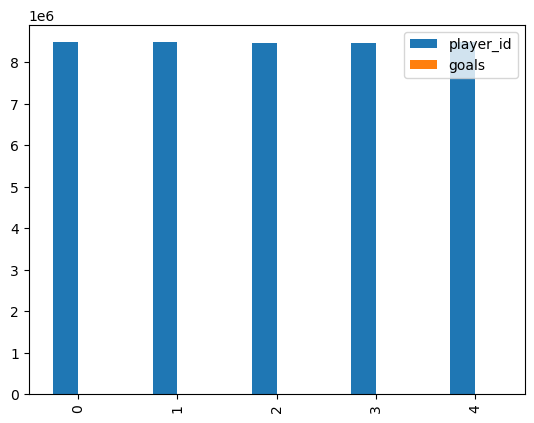

In [127]:
top5.plot.bar()

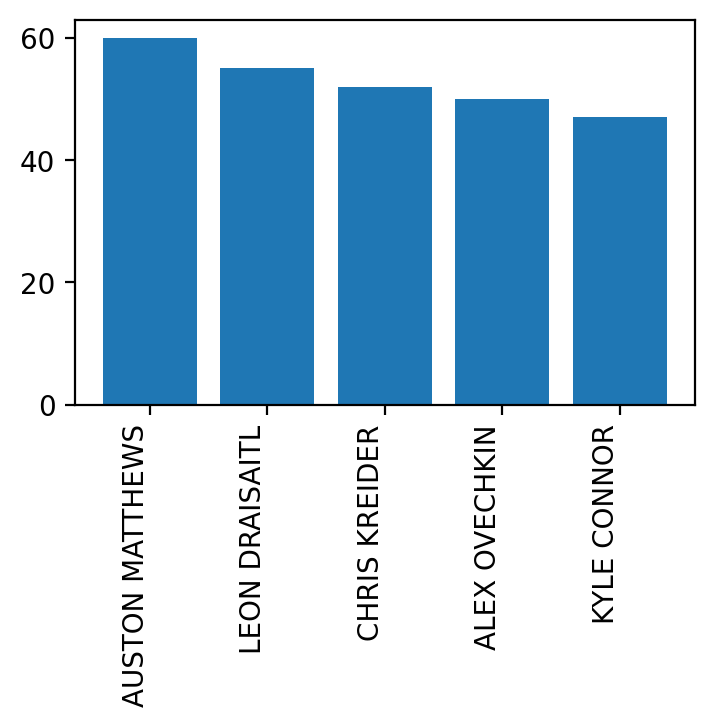

In [132]:
def make_viz():
    fig = plt.figure(figsize=(4, 2.5), dpi = 200)
    ax = plt.subplot(111)
    
    ax.bar(top5.player, top5.goals)
    plt.xticks(rotation=90, ha='right')

    return plt.show()

make_viz()

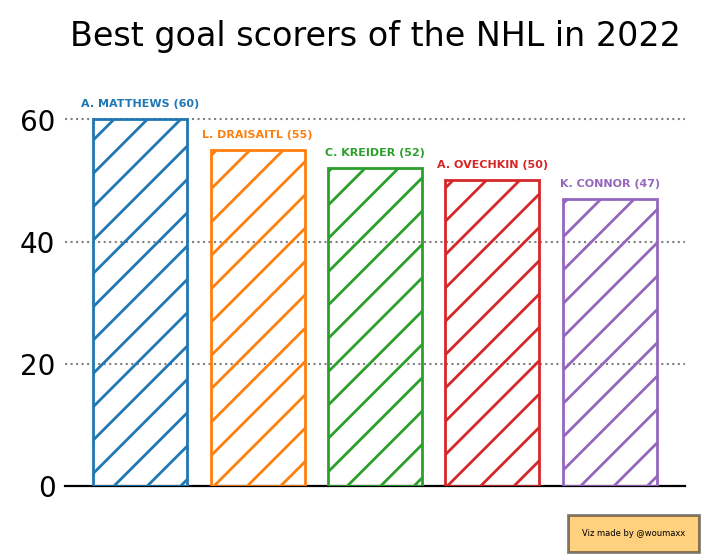

In [134]:
def make_viz():
    
    #Create the figure
    fig = plt.figure(figsize=(4, 2.5), dpi = 200)
    ax = plt.subplot(111)
    
    #Make a few adjustments to make the Viz look better
    ax.spines[["left","top", "right"]].set_visible(False)
    ax.axes.get_xaxis().set_ticks([]) #Remove ticks labels because you will see why later
    ax.tick_params(axis=u'both', which=u'both',length=0)


    #Add the grid
    ax.grid( visible = True, 
    lw = 0.75,
    ls = ":",
    color = "grey",
    zorder=1
    )
    
    #Make the bar chart with different colors (randomly picked)
    ax.bar(top5.player, top5.goals, zorder=20, edgecolor=["tab:blue", "tab:orange", "tab:green", "tab:red", "tab:purple"], hatch="//", fill=False)
    
    #Add the text since we removed ticks labels earlier 
    for i, c in zip(range(len(top5)), ["tab:blue", "tab:orange", "tab:green", "tab:red", "tab:purple"]):
        ax.text(i, top5.goals.iloc[i]+2, f"{top5.name.iloc[i]} ({top5.goals.iloc[i]})", size=4, ha="center",
               color=c, fontweight="bold")
    
    #Add title
    ax.set_title( "Best goal scorers of the NHL in 2022", y= 1.1,size=12)
    
    #Add your name
    plt.figtext(0.9, 0.01, "Viz made by @woumaxx", ha="right", fontsize=3, bbox={"facecolor":"orange", "alpha":0.5, "pad":5});
    #plt.savefig("tuto.png", dpi=600, facecolor="w", bbox_inches='tight')

    return plt.show()

make_viz()

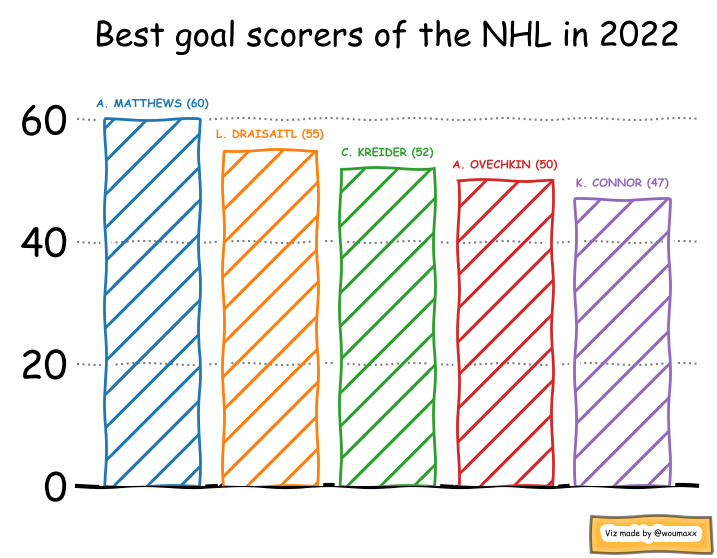

In [136]:
def make_viz():
    with plt.xkcd():  #To give the data more personality
        fig = plt.figure(figsize=(4, 2.5), dpi = 200)
        ax = plt.subplot(111)

        ax.spines[["left","top", "right"]].set_visible(False)
        ax.axes.get_xaxis().set_ticks([])
        ax.tick_params(axis=u'both', which=u'both',length=0)



        ax.grid( visible = True, 
        lw = 0.75,
        ls = ":",
        color = "grey",
        zorder=1
        )
        ax.bar(top5.player, top5.goals, zorder=20, edgecolor=["tab:blue", "tab:orange", "tab:green", "tab:red", "tab:purple"], hatch="//", fill=False)
        for i, c in zip(range(len(top5)), ["tab:blue", "tab:orange", "tab:green", "tab:red", "tab:purple"]):
            ax.text(i, top5.goals.iloc[i]+2, f"{top5.name.iloc[i]} ({top5.goals.iloc[i]})", size=4, ha="center",
                   color=c, fontweight="bold")
        ax.set_title( "Best goal scorers of the NHL in 2022", y= 1.1,size=12)

        plt.figtext(0.9, 0.01, "Viz made by @woumaxx", ha="right", fontsize=3, bbox={"facecolor":"orange", "alpha":0.5, "pad":5});
        plt.savefig("tuto.png", dpi=600, facecolor="w", bbox_inches='tight')

    return plt.show()

make_viz()